In [1118]:
n_neighbors_x = 0
min_dist_x = 0
n_components_x = 2
metric_x = 0
dimension_batch_size = 600
shared_b_size = 400
xx = 4800
cluster_size = 6


In [1119]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.cluster import KMeans
%matplotlib inline

In [1120]:
df = pd.read_csv('fashion-mnist_test.csv')
print('The shape of testing dataset : ', df.shape)
df = df.loc[df['label'].isin([0,1,2,3,4,5])]
df = df.dropna()
df.label.value_counts()

The shape of testing dataset :  (10000, 785)


label
0    1000
1    1000
2    1000
3    1000
5    1000
4    1000
Name: count, dtype: int64

In [1121]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [1122]:
vals = df.drop('label', axis=1).values
total_data = StandardScaler().fit_transform(vals)
total_data.shape[1]

total_data = total_data[:xx,:] 

In [1123]:
batchs = []
for i in range(0, total_data.shape[0], dimension_batch_size):
    start = max(0, i - shared_b_size)
    end = min(i+dimension_batch_size,  total_data.shape[0])
    b = total_data[start:end,:]
    batchs.append(b)
len(batchs)

8

In [1124]:
reducer = umap.UMAP(n_components=n_components_x)

In [1125]:
u_baches = []
counter = 0
for b in batchs:
    emb = reducer.fit_transform(b)
    u_baches.append(emb)
    print(counter)
    counter = counter + 1

0
1
2
3
4
5
6
7


In [1126]:
# integrated = []
# integrated.append(u_baches[0])
# for i in range(1, len(u_baches)):
#     concat = np.concatenate((integrated[i-1], u_baches[i]), axis=0)
#     integrated.append(concat)

In [1127]:
# b = 0
# plt.scatter(
#     u_baches[b][:, 0],
#     u_baches[b][:, 1],
#     c=[sns.color_palette()[x] for x in df.label[int(b*dimension_batch_size):int((b+1)*dimension_batch_size]).map({0:0, 1:1, 2:2})])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [1128]:
# b = 3
# plt.scatter(
#     integrated[b][:, 0],
#     integrated[b][:, 1],
#     c=[sns.color_palette()[x] for x in df.label[:(b+1)*dimension_batch_size].map({0:0, 1:1})])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [1129]:
kmeanList = []
for emb in u_baches:
    data = list(zip(emb[:,0], emb[:,1]))
    kmeans = KMeans(n_clusters=cluster_size)
    kmeans.fit(data)
    kmeanList.append(kmeans)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

In [1130]:
def get_value_map(lastLabels, kmeans):
    last = lastLabels[-shared_b_size:]
    curr = kmeans.labels_[:shared_b_size]
    map_of_clusters = {}
    for i in range(len(last)):
        if curr[i] in map_of_clusters.keys():
            map_of_clusters[curr[i]] += [last[i]]
        else:
            map_of_clusters[curr[i]] = [last[i]]
    for k in map_of_clusters.keys():
        map_of_clusters[k] = np.bincount(map_of_clusters[k]).argmax()
    return map_of_clusters

In [1131]:
labelsList = []
last_labels = []
for k in kmeanList:
    if len(last_labels) == 0:
        last_labels = k.labels_
        print(last_labels)
        labelsList.append(last_labels)
        continue
    value_map = get_value_map(last_labels, k)
    last_labels = []
    for l in k.labels_:
        last_labels.append(value_map[l])
    last_labels = np.array(last_labels)
    print(last_labels)
    labelsList.append(last_labels)


[3 1 4 2 5 3 4 3 5 2 2 4 5 2 5 2 2 1 0 2 2 1 0 1 3 3 2 2 2 4 3 5 5 2 5 2 2
 5 3 2 5 2 0 2 5 1 3 0 2 5 2 4 1 1 5 1 2 2 2 1 5 5 2 2 4 2 5 5 2 2 5 2 0 0
 5 2 0 3 4 1 3 0 2 2 3 4 3 5 1 2 2 2 3 2 5 5 5 2 4 5 3 5 5 2 5 5 1 5 5 5 0
 4 2 2 3 4 2 3 2 2 2 4 1 5 1 0 4 3 5 1 4 3 2 3 2 3 2 2 4 0 2 1 3 4 1 4 2 4
 0 5 2 2 0 1 0 2 2 3 2 1 0 3 2 5 4 5 5 1 2 2 5 5 2 2 2 2 5 2 2 2 0 4 0 2 2
 5 5 1 2 2 2 1 1 5 3 5 1 3 0 2 3 5 1 3 2 3 2 0 5 0 2 1 2 3 1 5 4 0 3 2 3 2
 5 4 0 2 2 3 1 2 0 2 3 2 2 2 5 4 1 2 2 4 4 5 5 5 5 2 4 0 3 3 2 5 0 3 4 3 3
 4 4 4 2 5 3 2 3 2 1 2 2 2 5 1 2 0 5 2 1 2 3 3 4 1 2 5 3 0 2 0 4 5 5 2 1 0
 2 0 4 3 5 5 1 2 4 2 1 1 5 1 2 2 5 5 2 4 5 2 3 3 2 2 4 4 5 2 2 0 0 5 5 5 2
 2 1 4 3 5 2 5 0 1 2 2 2 2 2 5 5 2 5 0 5 0 4 5 1 1 2 2 0 3 2 2 5 2 5 2 3 2
 0 2 5 1 1 5 4 0 5 3 3 1 1 5 1 3 4 2 5 0 1 5 4 0 4 1 5 5 5 2 5 2 1 1 4 2 4
 1 2 5 0 1 5 5 3 5 2 4 1 3 4 0 5 1 1 5 2 3 2 4 1 5 4 5 1 2 3 1 3 3 4 1 5 1
 3 5 2 5 5 3 4 4 4 5 2 5 1 5 2 1 3 5 2 5 5 2 1 2 0 3 3 2 1 5 4 2 2 5 1 1 1
 2 5 3 1 4 2 0 4 0 3 1 5 

In [1132]:
final_labels = np.array([])
final_emb = np.array([[0,0]])
for l in labelsList:
    final_labels = np.concatenate((final_labels, l[-dimension_batch_size:]), axis=0)

for l in u_baches:
    final_emb = np.concatenate((final_emb, l[-dimension_batch_size:,:]), axis=0)
final_emb = final_emb[1:,:]


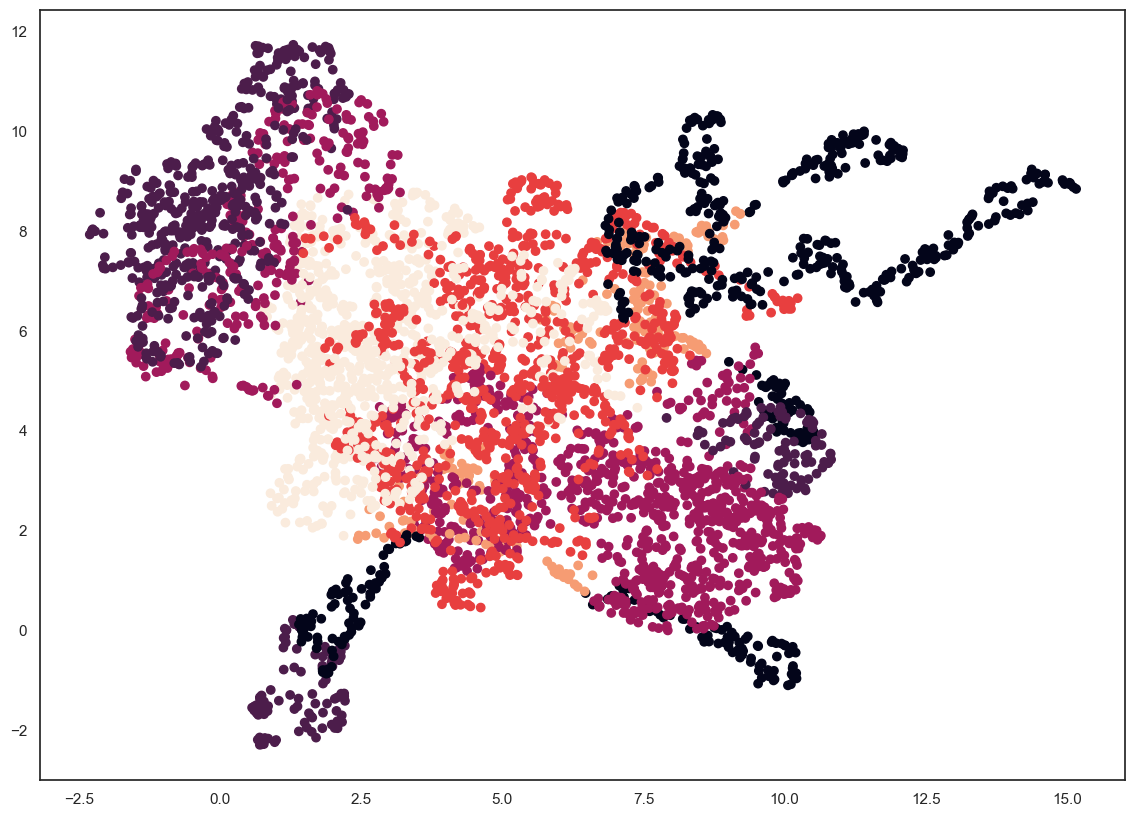

In [1133]:
ax = plt.scatter(final_emb[:,0], final_emb[:,1], c=final_labels.tolist())
ax.set_facecolor('#222')
plt.show()

In [1134]:
emb = reducer.fit_transform(total_data)
data = list(zip(emb[:,0], emb[:,1]))
kmeans = KMeans(n_clusters=cluster_size)
kmeans.fit(data)


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [1135]:
li = []
for i in range(len(total_data)):
    arr = total_data[i]
    x = tuple(arr)
    li.append(x)
kmeans7 = KMeans(n_clusters=cluster_size)
kmeans7.fit(li)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [1136]:
def get_v(lastLabels, listt):
    last = lastLabels
    curr = listt
    map_of_clusters = {}
    for i in range(len(last)):
        if curr[i] in map_of_clusters.keys():
            map_of_clusters[curr[i]] += [last[i]]
        else:
            map_of_clusters[curr[i]] = [last[i]]
    for k in map_of_clusters.keys():
        map_of_clusters[k] = np.bincount(map_of_clusters[k]).argmax()
    return map_of_clusters
  

In [1137]:
m = get_v(final_labels, kmeans.labels_)
t = 0
for i in range(len(final_labels)):
    if m[kmeans.labels_[i]] == final_labels[i]:
        t += 1
ac = t*100/len(final_labels)
print('tash', ac)

dff = df.label[:xx].values
m = get_v(dff, kmeans.labels_)
t = 0
for i in range(len(final_labels)):
    if m[kmeans.labels_[i]] == dff[i]:
        t += 1
ac = t*100/len(final_labels)
print('بالا', ac)

m = get_v(dff, kmeans7.labels_)
t = 0
for i in range(len(final_labels)):
    if m[kmeans7.labels_[i]] == dff[i]:
        t += 1
ac = t*100/len(final_labels)
print('bija', ac)

m = get_v(dff, final_labels)
t = 0
for i in range(len(final_labels)):
    if m[final_labels[i]] == dff[i]:
        t += 1
ac = t*100/len(final_labels)
print('khod', ac)

tash 83.35416666666667
بالا 70.04166666666667
bija 56.375
khod 69.39583333333333
